<a href="https://colab.research.google.com/github/Laxmi-Narayana-Chilakala/Stock-price-Prediction/blob/main/Stock_price_model_predictions-model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***STOCK PRICE PREDICTION***

In [ ]:
#Importing Required libraries for model building

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
#Loading data into notebook

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stock_data.csv to stock_data.csv


In [ ]:
#Reading data into a dataframe

In [ ]:
df=pd.read_csv('/content/stock_data.csv')

In [ ]:
#Checking first 5 rows from dataframe 

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [ ]:
#Checking shape of the dataframe

In [ ]:
df.shape

(19586, 8)

In [ ]:
#Checking last five rows of dataframe

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
19581,2017-11-06,178.56,180.450,178.310,180.17,13275578,0,FB
19582,2017-11-07,180.50,180.748,179.403,180.25,12903836,0,FB
19583,2017-11-08,179.79,180.350,179.110,179.56,10467606,0,FB
19584,2017-11-09,178.31,179.400,177.090,179.30,12602188,0,FB
19585,2017-11-10,178.35,179.100,177.960,178.46,11060355,0,FB


In [ ]:
#dataframe infofor descriptive analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     19586 non-null  object 
 1   Open     19586 non-null  float64
 2   High     19586 non-null  float64
 3   Low      19586 non-null  float64
 4   Close    19586 non-null  float64
 5   Volume   19586 non-null  int64  
 6   OpenInt  19586 non-null  int64  
 7   Stock    19586 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
#Checking description of data, how data varies 

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0
mean,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0
std,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0
50%,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0
75%,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0
max,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0


In [ ]:
#Converting date feature into datetime format

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date']

0       1984-09-07
1       1984-09-10
2       1984-09-11
3       1984-09-12
4       1984-09-13
           ...    
19581   2017-11-06
19582   2017-11-07
19583   2017-11-08
19584   2017-11-09
19585   2017-11-10
Name: Date, Length: 19586, dtype: datetime64[ns]

In [ ]:
 #Stock prices starts from

In [ ]:
df.Date.min()

Timestamp('1984-09-07 00:00:00')

In [ ]:
#Stock prices ends at

In [ ]:
df.Date.max()

Timestamp('2017-11-10 00:00:00')

In [ ]:
#Total Number of days

In [ ]:
(df.Date.max()-df.Date.min()).days

12117

In [ ]:
#Basic data visualization to check outliers using box plot

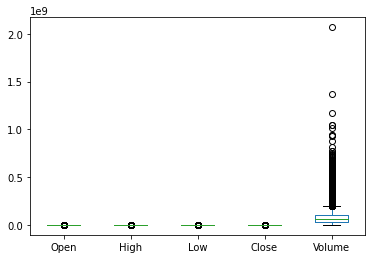

In [ ]:
df[df.columns[1:-2]].plot(kind='box')

In [ ]:
#Spliting of data into train and test

In [ ]:
data_training=df[df['Date']<'2015-01-01']

In [ ]:
#Train dataset

In [ ]:
data_training

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
18859,2014-12-24,81.03000,81.43000,80.75000,80.77000,7685480,0,FB
18860,2014-12-26,81.02000,81.28000,80.51000,80.78000,10642442,0,FB
18861,2014-12-29,80.49000,80.96000,79.71000,80.02000,14123244,0,FB
18862,2014-12-30,79.85000,80.59000,79.10000,79.22000,14367669,0,FB


In [ ]:
data_testing=df[df['Date']>='2015-01-01']

In [ ]:
#Test dataset

In [ ]:

data_testing

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
7642,2015-01-02,105.44,105.490,101.620,103.50,56196458,0,AAPL
7643,2015-01-05,102.51,102.830,99.790,100.58,67880159,0,AAPL
7644,2015-01-06,100.97,101.690,99.044,100.59,69460979,0,AAPL
7645,2015-01-07,101.49,102.420,100.990,102.01,42324520,0,AAPL
7646,2015-01-08,103.40,106.170,102.880,105.93,62679241,0,AAPL
...,...,...,...,...,...,...,...,...
19581,2017-11-06,178.56,180.450,178.310,180.17,13275578,0,FB
19582,2017-11-07,180.50,180.748,179.403,180.25,12903836,0,FB
19583,2017-11-08,179.79,180.350,179.110,179.56,10467606,0,FB
19584,2017-11-09,178.31,179.400,177.090,179.30,12602188,0,FB


In [ ]:
#Droping unused features from dataframe

In [ ]:

train_data=data_training.drop(['Date','OpenInt',	'Stock'],axis=1)
train_data

,Open,High,Low,Close,Volume
0,0.42388,0.42902,0.41874,0.42388,23220030
1,0.42388,0.42516,0.41366,0.42134,18022532
2,0.42516,0.43668,0.42516,0.42902,42498199
3,0.42902,0.43157,0.41618,0.41618,37125801
4,0.43927,0.44052,0.43927,0.43927,57822062
...,...,...,...,...,...
18859,81.03000,81.43000,80.75000,80.77000,7685480
18860,81.02000,81.28000,80.51000,80.78000,10642442
18861,80.49000,80.96000,79.71000,80.02000,14123244
18862,79.85000,80.59000,79.10000,79.22000,14367669


In [ ]:
#Data standardization is the process of bringing data into a uniform format

In [ ]:
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data)
train_data

array([[0.00124018, 0.00124186, 0.00125401, 0.00124725, 0.01121865],
       [0.00124018, 0.00122861, 0.00123589, 0.00123837, 0.00870751],
       [0.00124463, 0.00126815, 0.00127691, 0.00126523, 0.02053281],
       ...,
       [0.27963149, 0.27764552, 0.2841009 , 0.27958183, 0.00682358],
       [0.2774062 , 0.27637558, 0.28192491, 0.27678437, 0.00694167],
       [0.27629355, 0.27366409, 0.2775016 , 0.27258816, 0.00967997]])

In [ ]:
X_train= []
y_train= []

In [ ]:
#Preparation of data for timesires model building based on previous 60 timestamps

In [ ]:
for i in range(60,train_data.shape[0]):
  X_train.append(train_data[i-60:i])
  y_train.append(train_data[i,3])

In [ ]:
X_train, y_train  = np.array(X_train), np.array(y_train)

In [ ]:
#train shape

In [ ]:
X_train.shape, y_train.shape

((16638, 60, 5), (16638,))

In [ ]:
#Model Builing using LSTM Networks

In [ ]:
regression= Sequential()

regression.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],5)))
regression.add(Dropout(0.2))

regression.add(LSTM(units=60, activation='relu', return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units=80, activation='relu', return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units=100, activation='relu', return_sequences=True))
regression.add(Dropout(0.3))

regression.add(LSTM(units=120, activation='relu'))
regression.add(Dropout(0.2))

regression.add(Dense(units=1))

In [ ]:
#CHecking model summary, how many neurons in network

In [ ]:
regression.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 100)          

In [ ]:
#Compiling the model with optimizer and loss function

In [ ]:
regression.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Model fitting

In [ ]:
history=regression.fit(X_train,y_train, epochs=20, batch_size=32)

Epoch 1/20
520/520 [==============================] - 226s 427ms/step - loss: 0.0021
Epoch 2/20
520/520 [==============================] - 221s 426ms/step - loss: 0.0011
Epoch 3/20
520/520 [==============================] - 219s 422ms/step - loss: 7.5867e-04
Epoch 4/20
520/520 [==============================] - 223s 428ms/step - loss: 6.2253e-04
Epoch 5/20
520/520 [==============================] - 221s 424ms/step - loss: 5.7389e-04
Epoch 6/20
520/520 [==============================] - 219s 422ms/step - loss: 6.6106e-04
Epoch 7/20
520/520 [==============================] - 220s 422ms/step - loss: 4.7694e-04
Epoch 8/20
520/520 [==============================] - 217s 418ms/step - loss: 4.9284e-04
Epoch 9/20
520/520 [==============================] - 219s 422ms/step - loss: 4.6710e-04
Epoch 10/20
520/520 [==============================] - 221s 425ms/step - loss: 4.0917e-04
Epoch 11/20
520/520 [==============================] - 218s 420ms/step - loss: 3.3955e-04
Epoch 12/20
520/520 [======

In [ ]:
data_testing.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
7642,2015-01-02,105.44,105.49,101.620,103.50,56196458,0,AAPL
7643,2015-01-05,102.51,102.83,99.790,100.58,67880159,0,AAPL
7644,2015-01-06,100.97,101.69,99.044,100.59,69460979,0,AAPL
7645,2015-01-07,101.49,102.42,100.990,102.01,42324520,0,AAPL
7646,2015-01-08,103.40,106.17,102.880,105.93,62679241,0,AAPL


In [ ]:
data_training.tail(60)

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
18804,2014-10-07,77.05,77.95,76.24,76.29,25290441,0,FB
18805,2014-10-08,76.18,77.71,75.10,77.52,32951966,0,FB
18806,2014-10-09,77.28,77.76,75.85,75.91,32464353,0,FB
18807,2014-10-10,75.59,76.50,72.76,72.91,52123628,0,FB
18808,2014-10-13,73.23,74.78,72.52,72.99,43912906,0,FB
18809,2014-10-14,74.00,74.18,72.05,73.59,50272600,0,FB
18810,2014-10-15,71.69,73.80,70.32,73.21,61470856,0,FB
18811,2014-10-16,70.79,73.35,70.58,72.63,53509985,0,FB
18812,2014-10-17,74.20,76.00,73.75,75.95,76326625,0,FB
18813,2014-10-20,75.60,77.09,75.38,76.95,34646147,0,FB


In [ ]:
past_60_days=data_training.tail(60)

In [ ]:
df1=past_60_days.append(data_testing,ignore_index=True)
df1

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,2014-10-07,77.05,77.950,76.240,76.29,25290441,0,FB
1,2014-10-08,76.18,77.710,75.100,77.52,32951966,0,FB
2,2014-10-09,77.28,77.760,75.850,75.91,32464353,0,FB
3,2014-10-10,75.59,76.500,72.760,72.91,52123628,0,FB
4,2014-10-13,73.23,74.780,72.520,72.99,43912906,0,FB
...,...,...,...,...,...,...,...,...
2943,2017-11-06,178.56,180.450,178.310,180.17,13275578,0,FB
2944,2017-11-07,180.50,180.748,179.403,180.25,12903836,0,FB
2945,2017-11-08,179.79,180.350,179.110,179.56,10467606,0,FB
2946,2017-11-09,178.31,179.400,177.090,179.30,12602188,0,FB


In [ ]:
df1=df1.drop(['Date','OpenInt',	'Stock'], axis=1)
df1.head()

,Open,High,Low,Close,Volume
0,77.05,77.95,76.24,76.29,25290441
1,76.18,77.71,75.10,77.52,32951966
2,77.28,77.76,75.85,75.91,32464353
3,75.59,76.50,72.76,72.91,52123628
4,73.23,74.78,72.52,72.99,43912906


In [ ]:
inputs=scaler.transform(df1)
inputs

array([[0.26767055, 0.2673144 , 0.27172275, 0.26653864, 0.01221896],
       [0.26464555, 0.26649066, 0.26765616, 0.27083974, 0.01592059],
       [0.26847027, 0.26666227, 0.27033155, 0.26520984, 0.01568501],
       ...,
       [0.62489934, 0.61877833, 0.63867946, 0.6276569 , 0.00505738],
       [0.61975335, 0.61551768, 0.63147373, 0.62674772, 0.00608869],
       [0.61989243, 0.614488  , 0.63457719, 0.62381038, 0.00534376]])

In [ ]:
#Test data preparation for model prediction 

In [ ]:
X_test=[]
y_test=[]

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i,3])

In [ ]:
inputs[60,3]

0.3616875451091852

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((2888, 60, 5), (2888,))

In [ ]:
#Model prediction using test data

In [ ]:
y_pred=regression.predict(X_test)

In [ ]:
scaler.scale_

array([3.47701761e-03, 3.43226494e-03, 3.56718871e-03, 3.49683606e-03,
       4.83145523e-10])

In [ ]:
y_pred[:10]

array([[0.32888097],
       [0.3326506 ],
       [0.34041542],
       [0.35171306],
       [0.3654772 ],
       [0.38038284],
       [0.3952365 ],
       [0.40878862],
       [0.41993004],
       [0.42804766]], dtype=float32)

In [ ]:
#making into normal scale from standardizing

In [ ]:
scale=1/3.49683606e-03
scale

285.9728002232967

In [ ]:
y_pred=y_pred*scale
y_test=y_test*scale

In [ ]:
inputs[60,0]*scale

104.77559565960208

In [ ]:
#Predicting output

In [ ]:
y_pred[:10]

array([[ 94.05101 ],
       [ 95.12903 ],
       [ 97.349556],
       [100.580376],
       [104.51654 ],
       [108.779144],
       [113.02689 ],
       [116.90243 ],
       [120.08857 ],
       [122.40999 ]], dtype=float32)

In [ ]:
#After Prediction evalauating with actual vs predicted 

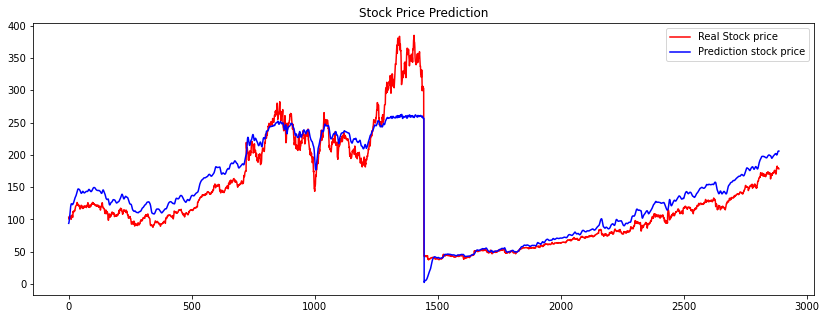

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color='red',label='Real Stock price')
plt.plot(y_pred,color='blue', label='Prediction stock price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [ ]:
#https://medium.com/swlh/predicting-stock-prices-using-deep-learning-models-310b41cec90a
#refer above link and can implement GRU network in place of LSTM networks